In [25]:
from __future__ import annotations
import os

os.chdir("..")

from src.nanograd.value import Value
from src.nanograd.nn import MLP

In [26]:
# This is how you can create and manipulate values
# Values accept floats or ints as data and can be assigned a label
a = Value(2.0, label="a")
b = Value(4.0, label="b")
c = a * b
c.label = "c"
d = Value(3.0, label="d")
e = c + d
e.label = "e"
e

Value(data=11.0)

In [27]:
# you can take derivatives of a value w.r.t another value
e.backward()
e.grad

1.0

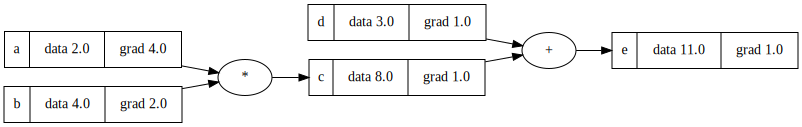

In [28]:
# Visualize the computation graph
e.visualize()

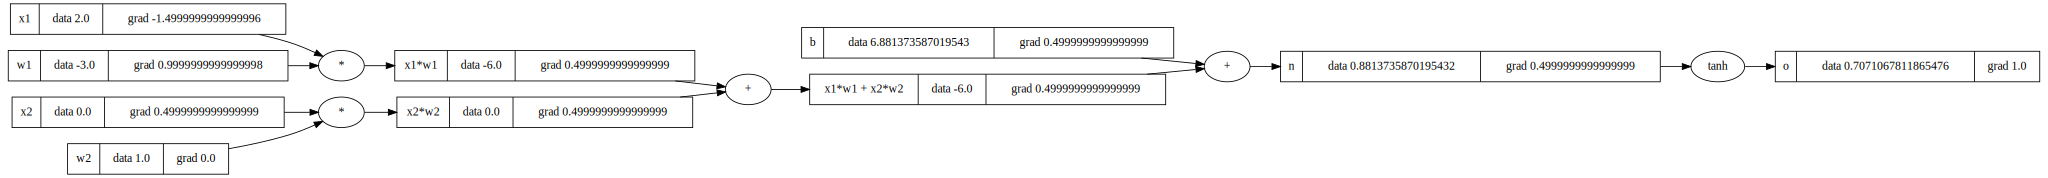

In [29]:
# Consider a more complex example
# Define inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# Define weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# Define bias of the neuron
b = Value(6.8813735870195432, label="b")

# Calculate dot product of inputs and weights vectors: x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
mlp = x1w1x2w2 + b
mlp.label = "n"

# Apply activation function
o = mlp.tanh()
o.label = "o"

# Perform backpropagation
o.backward()

# Visualize
o.visualize()

In [30]:
# Let's train a simple MLP

# Data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
xs_val = []
for x in xs:
    x_i = []
    for xi in x:
        x_i.append(Value(xi, label=f"x_{xi}"))
    xs_val.append(x_i)
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets
ys_val = [Value(y) for y in ys]

# Define multi-layer perceptron with 3 inputs, 2 hidden layers with 4 neurons each, and 1 output
# layer with 1 neuron and tanh activation function
mlp = MLP(3, [4, 4, 1], "tanh")

In [33]:
# Train for 20 epochs with learning rate 0.1
EPOCHS = 20
alpha = 0.1

loss = Value(0.0)
for k in range(EPOCHS):
    # generate predictions
    ypred = [mlp(xs_val[i], i) for i in range(len(xs))]

    # calculate loss as MSE
    for y, ypred_i in zip(ys_val, ypred):
        loss += (y - ypred_i) ** 2
    print(f"Current loss: {loss.data}")
    params = mlp.parameters()

    # reset gradients
    for p in params:
        p.grad = 0.0

    # perform backpropagation
    loss.backward()

    # update parameters
    for p in params:
        p.data -= alpha * p.grad

# Visualize the computation graph of the first sample
loss.visualize()

Current loss: 5.056429178670651
Current loss: 8.03833271175852
Current loss: 16.038331808819827


OverflowError: math range error